In [54]:
from functions import Model, get99, reg_train_test, splitData, dropMissingValues, z_score, outliers_knn, outliers_dbscan, getNoise, getRelFeatures, drop_features, getCombinations, get_unique_list, bold, blue, red, green, np_to_df, df_to_np
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
import numpy as np
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


In [2]:
#TODO SPLIT_SIZE = [0.15, 0.25, 0.33]
SPLIT_SIZE = 0.25

#TODO OUTLIER99 = [] 

OUTLIER_ZSCORE = {"STD": [3, 6, 9]}
OUTLIER_KNN = {"K": [3, 5], "X": [200, 1000]}
OUTLIER_DBSCAN = {"K": [3, 5], "X": [200, 1000], "EPS": [0.42, 0.5], "MIN_SAMPLES": [5, 10]} #?? gute auswahl
OUTLIER_NOISE = {"CV": [3, 5, 10]}

#TODO FEATURE

#TODO Regressionmodels

#TODO TESTDATA --> path to csv-file


In [3]:
#Get raw Data
df = pd.read_csv("data/csv/house_data_training.csv", sep=';') 
# remove unnamed column
df = df.iloc[:, 1:]
#Transform string to datetime
df["date"] = pd.to_datetime(df["date"])

maeList = []#for model selection

In [4]:
df = dropMissingValues(df) 

In [5]:
# Outlier Detection
outlier_lists_all = []

outlier_list_99 = get99(df) #TODO Mean for price for trainingsdata

print('starting z_score')
for p in OUTLIER_ZSCORE["STD"]:
    print(p)
    outlier_list_z_score = z_score(df, p)
    outlier_lists_all.append(outlier_list_z_score)


print('done \n\n starting knn')
for k in OUTLIER_KNN["K"]:
    for o in OUTLIER_KNN["X"]:
        print(k, o)
        outlier_list_knn = outliers_knn(df, k, o)
        outlier_lists_all.append(outlier_list_knn)

print('done \n\n starting db_scan')
outlier_list_dbscan = outliers_dbscan(df)#too many
outlier_lists_all.append(outlier_list_dbscan)

print('done \n\n starting noise')
for cv in OUTLIER_NOISE["CV"]:
        print(cv)
        outlier_list_noise = getNoise(df, cv)
        outlier_lists_all.append(outlier_list_noise)
print('done')

# outlier_lists_all = [outlier_list_99, outlier_list_z_score, outlier_list_knn, outlier_list_dbscan, outlier_list_noise]

starting z_score
3
6
9
done 

 starting knn
3 200
3 1000
5 200
5 1000
done 

 starting db_scan
done 

 starting noise
3
5
10
done


In [6]:
combination_list = []
for i, combo in enumerate(getCombinations(range(len(outlier_lists_all))), 1):
    if not i == 1:
        combination_list.append(combo)
        print('combo #{}: {}'.format(i, combo))

combo #2: (0,)
combo #3: (1,)
combo #4: (2,)
combo #5: (3,)
combo #6: (4,)
combo #7: (5,)
combo #8: (6,)
combo #9: (7,)
combo #10: (8,)
combo #11: (9,)
combo #12: (10,)
combo #13: (0, 1)
combo #14: (0, 2)
combo #15: (0, 3)
combo #16: (0, 4)
combo #17: (0, 5)
combo #18: (0, 6)
combo #19: (0, 7)
combo #20: (0, 8)
combo #21: (0, 9)
combo #22: (0, 10)
combo #23: (1, 2)
combo #24: (1, 3)
combo #25: (1, 4)
combo #26: (1, 5)
combo #27: (1, 6)
combo #28: (1, 7)
combo #29: (1, 8)
combo #30: (1, 9)
combo #31: (1, 10)
combo #32: (2, 3)
combo #33: (2, 4)
combo #34: (2, 5)
combo #35: (2, 6)
combo #36: (2, 7)
combo #37: (2, 8)
combo #38: (2, 9)
combo #39: (2, 10)
combo #40: (3, 4)
combo #41: (3, 5)
combo #42: (3, 6)
combo #43: (3, 7)
combo #44: (3, 8)
combo #45: (3, 9)
combo #46: (3, 10)
combo #47: (4, 5)
combo #48: (4, 6)
combo #49: (4, 7)
combo #50: (4, 8)
combo #51: (4, 9)
combo #52: (4, 10)
combo #53: (5, 6)
combo #54: (5, 7)
combo #55: (5, 8)
combo #56: (5, 9)
combo #57: (5, 10)
combo #58: (6, 

In [7]:
model_obj_list = []
for i, c in enumerate(combination_list):
    print(f'i: {i}')
    outlier_list = get_unique_list(outlier_lists_all, c)
    try: 
        X_train, X_test, y_train, y_test = splitData(df, SPLIT_SIZE, outlier_list)
        #model = reg_train_test(X_train, X_test, y_train, y_test)
        model = LinearRegression()
        obj = Model(model, (X_train, X_test, y_train, y_test), c)
        model_obj_list.append(obj)
    except:
        print(red("Error in Combination: "), c)
        pass

i: 0
(0,)
dropped 1288 / 1717 rows
i: 1
(1,)
dropped 149 / 197 rows
i: 2
(2,)
dropped 46 / 60 rows
i: 3
(3,)
Error in Combination:  (3,)
i: 4
(4,)
Error in Combination:  (4,)
i: 5
(5,)
Error in Combination:  (5,)
i: 6
(6,)
Error in Combination:  (6,)
i: 7
(7,)
dropped 2582 / 2762 rows
i: 8
(8,)
dropped 312 / 426 rows
i: 9
(9,)
dropped 313 / 427 rows
i: 10
(10,)
dropped 309 / 425 rows
i: 11
(0, 1)
dropped 1288 / 1288 rows
i: 12
(0, 2)
dropped 1288 / 1288 rows
i: 13
(0, 3)
dropped 1457 / 1471 rows
i: 14
(0, 4)
dropped 2137 / 2194 rows
i: 15
(0, 5)
dropped 1457 / 1471 rows
i: 16
(0, 6)
dropped 2137 / 2194 rows
i: 17
(0, 7)
dropped 3578 / 3578 rows
i: 18
(0, 8)
dropped 1292 / 1292 rows
i: 19
(0, 9)
dropped 1293 / 1293 rows
i: 20
(0, 10)
dropped 1289 / 1289 rows
i: 21
(1, 2)
dropped 149 / 149 rows
i: 22
(1, 3)
dropped 335 / 349 rows
i: 23
(1, 4)
dropped 1085 / 1142 rows
i: 24
(1, 5)
dropped 335 / 349 rows
i: 25
(1, 6)
dropped 1085 / 1142 rows
i: 26
(1, 7)
dropped 2699 / 2699 rows
i: 27
(1, 

In [8]:
#Feature Selection
list_relevant_features = getRelFeatures(df)
#df_dropped_features = drop_features(df, list_relevant_features)

In [9]:
#Summary
df_summary = pd.DataFrame(columns=['combo', 'mae', 'score'])
for o in model_obj_list:
    #print(f'{o.get_type()}, {o.get_comb()}')
    o.train()
    mae, score = o.summary()
    comb = o.get_comb()
    row = {'combo': comb, 'mae': mae, 'score': score}
    df_summary = df_summary.append(row, ignore_index=True)

df_summary.sort_values("mae")



,combo,mae,score
6,"(10,)",6282399.13,0.0495
60,"(8, 10)",6283429.62,0.0495
4,"(8,)",6283429.62,0.0495
5,"(9,)",6284195.62,0.0495
61,"(9, 10)",6285258.34,0.0495
...,...,...,...
1879,"(0, 1, 3, 4, 6, 7, 9, 10)",6497912.52,0.0492
1247,"(0, 3, 6, 7, 9, 10)",6497912.52,0.0492
1881,"(0, 1, 3, 4, 7, 8, 9, 10)",6497912.52,0.0492
1639,"(0, 2, 3, 6, 7, 9, 10)",6497912.52,0.0492


In [10]:
#row
print(f'{bold("Lowest mae:")} {df_summary[df_summary.mae==df_summary.mae.min()]}')
print(f'\n{bold("Highest score:")} {df_summary[df_summary.score==df_summary.score.max()]}')

#df_summary["mae"].min()

Lowest mae:    combo         mae   score
6  (10,)  6282399.13  0.0495

Highest score:                           combo         mae   score
27                       (2, 4)  6363213.37  0.0496
29                       (2, 6)  6363213.37  0.0496
34                       (3, 4)  6355882.29  0.0496
36                       (3, 6)  6355882.29  0.0496
41                       (4, 5)  6355882.29  0.0496
...                         ...         ...     ...
1788     (2, 3, 4, 6, 8, 9, 10)  6345845.77  0.0496
1793     (2, 3, 5, 6, 8, 9, 10)  6345845.77  0.0496
1799     (2, 4, 5, 6, 8, 9, 10)  6345845.77  0.0496
1806     (3, 4, 5, 6, 8, 9, 10)  6338405.55  0.0496
1970  (2, 3, 4, 5, 6, 8, 9, 10)  6345845.77  0.0496

[222 rows x 3 columns]


In [11]:
# df_summary[df_summary.mae==df_summary.mae.min()]

# model_obj_list[6]

# Normalization

In [82]:
# Stelle 6 der Model List hat die Kombination mit dem besten MEA
dfNorm = model_obj_list[60]

# Model in jeweiloigen Variablen schreiben
X_train, X_test, y_train, y_test = dfNorm.get_data()

y_trainN = []

for i in y_train:
    print(i)
    y_trainN.append(i)


np.asarray(y_trainN)


print(y_trainN.shape)
# for i in y_test:
#     y_testN

# # X Daten zusammenfassen
# npNorm = np.concatenate((X_train, X_test))

# npNormY = np.concatenate((y_train, y_test))

# print(len(npNorm))

# # Column Liste des Orginal DF erstellen
# column_list = df.columns.to_list()
# column_list.remove("price")

dfNorm = np_to_df(npNorm, column_list)



[190500.]
[335000.]
[425000.]
[555000.]
[360000.]
[1228000.]
[250000.]
[433500.]
[725000.]
[259950.]
[740000.]
[435000.]
[229000.]
[670000.]
[445000.]
[355000.]
[515000.]
[456000.]
[604000.]
[174000.]
[322000.]
[570000.]
[185000.]
[22500.]
[2641100.]
[2260000.]
[415000.]
[99999999.]
[218000.]
[875909.]
[710000.]
[525000.]
[1700000.]
[385000.]
[650000.]
[555000.]
[1050000.]
[230005.]
[969000.]
[229500.]
[920000.]
[670000.]
[385200.]
[800000.]
[780000.]
[315500.]
[364950.]
[425000.]
[357000.]
[330000.]
[395000.]
[2600000.]
[291850.]
[364000.]
[1675000.]
[795000.]
[785000.]
[840000.]
[420000.]
[1582500.]
[549900.]
[28700.]
[263950.]
[221347.]
[217500.]
[465000.]
[349000.]
[5350000.]
[960000.]
[1710000.]
[243000.]
[385000.]
[455000.]
[439950.]
[265000.]
[351000.]
[320000.]
[285000.]
[3075000.]
[275000.]
[551000.]
[560000.]
[406000.]
[246950.]
[397380.]
[1650000.]
[1005000.]
[614000.]
[749000.]
[307000.]
[369500.]
[300000.]
[610950.]
[562000.]
[279000.]
[740000.]
[446000.]
[298500.]
[999999

AttributeError: 'list' object has no attribute 'shape'

In [62]:
# Nur relevante Features auswählen
rel_column_list = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']

dfNorm = dfNorm[rel_column_list]

rel_np = df_to_np(dfNorm)

## MinMaxScaler

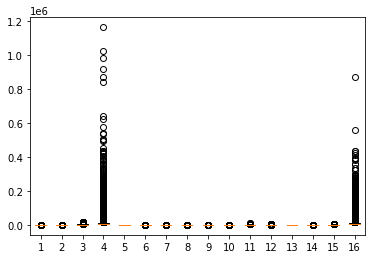

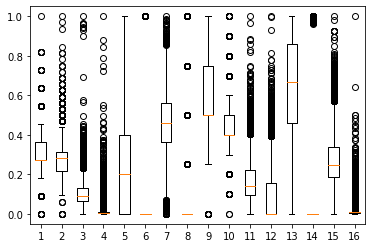

In [63]:
minmax_scaler = MinMaxScaler()

plt.boxplot(rel_np)
plt.show()

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(rel_np)

scaled_rel_np=minmax_scaler.transform(rel_np)

plt.boxplot(scaled_rel_np)
plt.show()

## RobustScaler

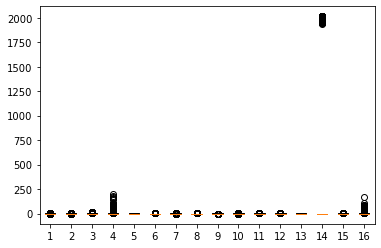

In [64]:

rob_scaler = RobustScaler()
rob_scaler.fit(rel_np)

scaled_rel_np=rob_scaler.transform(rel_np)

plt.boxplot(scaled_rel_np)
plt.show()

In [67]:
dfNorm 
dfNorm

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,dis_super,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3.0,1.50,1110.0,1150.0,2.0,0.0,863.96,0.0,3.0,8.0,940.0,170.0,2007.0,0.0,1380.0,1751.0
1,2.0,1.00,1070.0,6678.0,1.0,0.0,1108.04,0.0,4.0,7.0,1070.0,0.0,1951.0,0.0,1680.0,7788.0
2,3.0,1.50,1660.0,5665.0,1.0,0.0,1154.10,0.0,5.0,7.0,920.0,740.0,1918.0,0.0,1530.0,5665.0
3,4.0,2.25,2350.0,8140.0,1.0,0.0,863.06,0.0,4.0,8.0,1430.0,920.0,1977.0,0.0,2640.0,8700.0
4,4.0,1.50,1720.0,6417.0,1.0,0.0,838.77,0.0,3.0,7.0,1720.0,0.0,1953.0,0.0,1430.0,6240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14680,3.0,1.75,1340.0,13115.0,1.0,0.0,1153.49,0.0,3.0,7.0,1340.0,0.0,1978.0,0.0,1370.0,10800.0
14681,3.0,1.75,1780.0,5175.0,1.0,0.0,1064.61,0.0,4.0,7.0,990.0,790.0,1927.0,0.0,1780.0,5175.0
14682,4.0,1.50,1770.0,5750.0,2.0,0.0,803.12,0.0,3.0,7.0,1770.0,0.0,1947.0,0.0,970.0,5750.0
14683,4.0,2.50,3110.0,5868.0,2.0,0.0,1211.46,0.0,3.0,8.0,3110.0,0.0,2001.0,0.0,2950.0,5924.0


In [70]:
SPLIT_SIZE = 0.25
dfNorm1 = np_to_df(scaled_rel_np, rel_column_list)



dfNorm1["price"] = npNormY.tolist()


X_train, X_test, y_train, y_test = splitData(dfNorm1, SPLIT_SIZE)
model = LinearRegression()
obj = Model(model, (X_train, X_test, y_train, y_test), "mean")
model_obj_list.append(obj)

NameError: name 'npNormY' is not defined